<a href="https://colab.research.google.com/github/NVREND/predictive-analytics-ML-terapan/blob/main/HeartDiseasePredictiveAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# Data Loading

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp '/content/kaggle.json' ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

cp: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!kaggle datasets download -d fedesoriano/heart-failure-prediction

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0
  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 17.6MB/s]


In [ ]:
!unzip /content/heart-failure-prediction.zip

Archive:  /content/heart-failure-prediction.zip
  inflating: heart.csv               


In [ ]:
df= pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


The code output above provides the following information:

- There are 918 rows in the dataset.
- There are 10 columns, namely: Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


It can be seen that:
  - There are 5 columns with object types, namely: Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope
  - There are 6 numeric columns with type int64, namely: Age, RestigBP, Cholesterol, FastingBS, MaxHR, HeartDisease
  - There is 1 numeric column with type float64, namely Oldpeak

# Data Understanding

Attribute Information
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
-ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: -Non-Anginal Pain, ASY: Asymptomatic]
-RestingBP: resting blood pressure [mm Hg]
-Cholesterol: serum cholesterol [mm/dl]
-FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
-RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
-MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
-ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
-Oldpeak: oldpeak = ST [Numeric value measured in depression]
-ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
-HeartDisease: output class [1: heart disease, 0: Normal]



# EDA

In [ ]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.describe(include="all")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [ ]:
# Calculate the percentage of heart disease
hd_count = df['HeartDisease'].value_counts().reset_index(name='count')
hd_count.columns = ['HeartDisease', 'count']
hd_count['persentage'] = (hd_count['count'] / hd_count['count'].sum()) * 100
hd_count

,HeartDisease,count,persentage
0,1,508,55.337691
1,0,410,44.662309


From this data, we can conclude that in this dataset, more individuals were indicated to have heart disease (55.34%) than those who did not have heart disease (44.66%).

## Univariatve Analysis

- Ctegorical Features = Sex, ChestPainType, FastingBs, RestingECG, ExerciseAngina:, ST_Slope, HeartDisease
- numerical features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']



In [ ]:
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Categorical Features

#### Feature Sex

     jumlah sampel  persentase
Sex                           
M              725        79.0
F              193        21.0


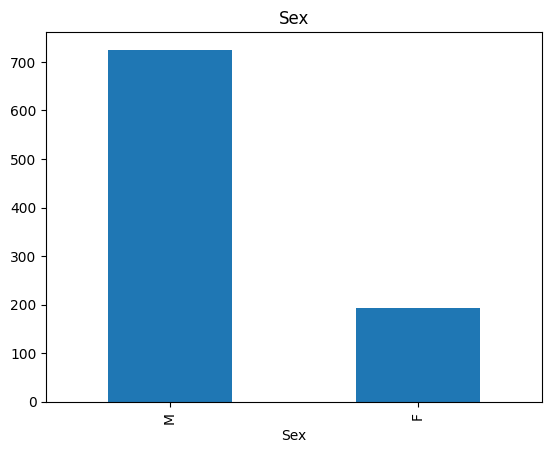

In [ ]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_percent = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_percent)
count.plot(kind='bar', title=feature);

Dalam dataset mayoritas sampel dalam dataset adalah Male dengan persentase 79.0%, sementara Female memiliki persentase 21.0%.

#### Feature ChestPainType

               jumlah sampel  persentase
ChestPainType                           
ASY                      496        54.0
NAP                      203        22.1
ATA                      173        18.8
TA                        46         5.0


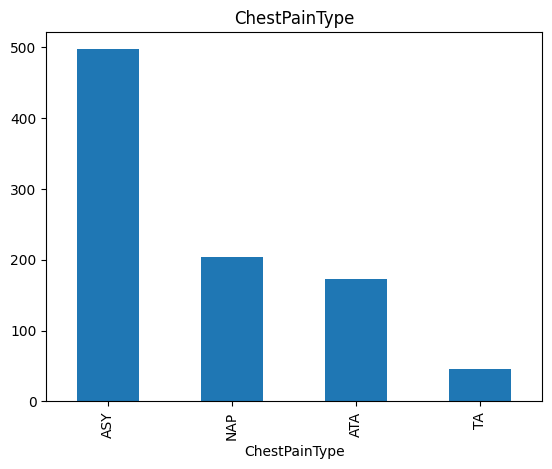

In [ ]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_percent = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_percent)
count.plot(kind='bar', title=feature);

Terdapat empat kategori dalam feature ChestPainType, yaitu TA: Typical Angina, ATA: Atypical Angina, NAP: -Non-Anginal Pain, ASY: Asymptomatic. Mayoritas pasien dalam dataset mengalami jenis nyeri dada asimtomatik (ASY), dengan 54.0% dari total sampel. Ini diikuti oleh nyeri non-anginal (NAP) dengan 22.1%, angina tipikal (ATA) dengan 18.8%, dan angina atipikal (TA) dengan hanya 5.0% dari total sampel.

#### Feature FastingBS

           jumlah sampel  persentase
FastingBS                           
0                    704        76.7
1                    214        23.3


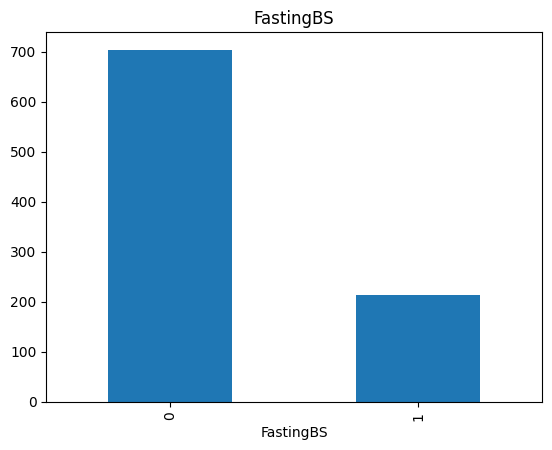

In [ ]:
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_percent = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_percent)
count.plot(kind='bar', title=feature);

Terdapat 2 kategori dalam feature FastingBS, yaitu fasting blood sugar 1: if FastingBS > 120 mg/dl, 0: otherwise.
Grafik batang juga menunjukkan distribusi kategori secara visual, dengan mayoritas pasien (76.7%) tidak berpuasa, sementara 23.3% dari total sampel berpuasa. Analisis fitur "FastingBS" dapat menjadi faktor yang relevan dalam memahami prediksi gagal jantung.

#### RestingECG

            jumlah sampel  persentase
RestingECG                           
Normal                552        60.1
LVH                   188        20.5
ST                    178        19.4


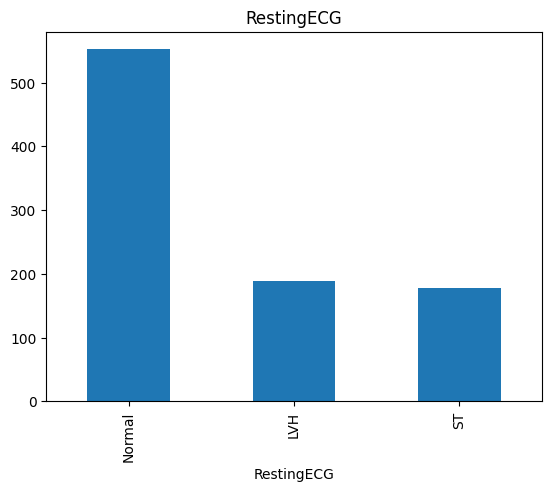

In [ ]:
feature = categorical_features[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_percent = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_percent)
count.plot(kind='bar', title=feature);

#### ExerciseAngina

                jumlah sampel  persentase
ExerciseAngina                           
N                         547        59.6
Y                         371        40.4


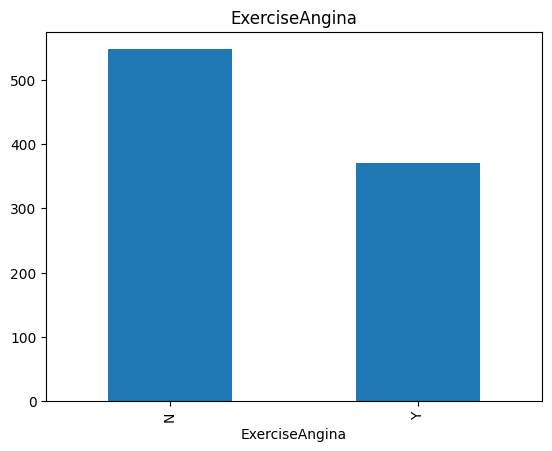

In [ ]:
feature = categorical_features[4]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_percent = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_percent)
count.plot(kind='bar', title=feature);

#### Feature ST_Slope

          jumlah sampel  persentase
ST_Slope                           
Flat                460        50.1
Up                  395        43.0
Down                 63         6.9


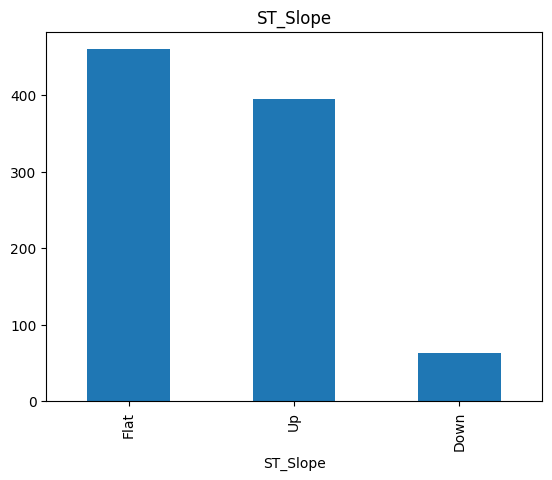

In [ ]:
feature = categorical_features[5]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_percent = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_percent)
count.plot(kind='bar', title=feature);

Mayoritas data memiliki kemiringan ST yang "Flat" (50.1%), diikuti oleh "Up" (43.0%) dan "Down" (6.9%).

### Numerical Features

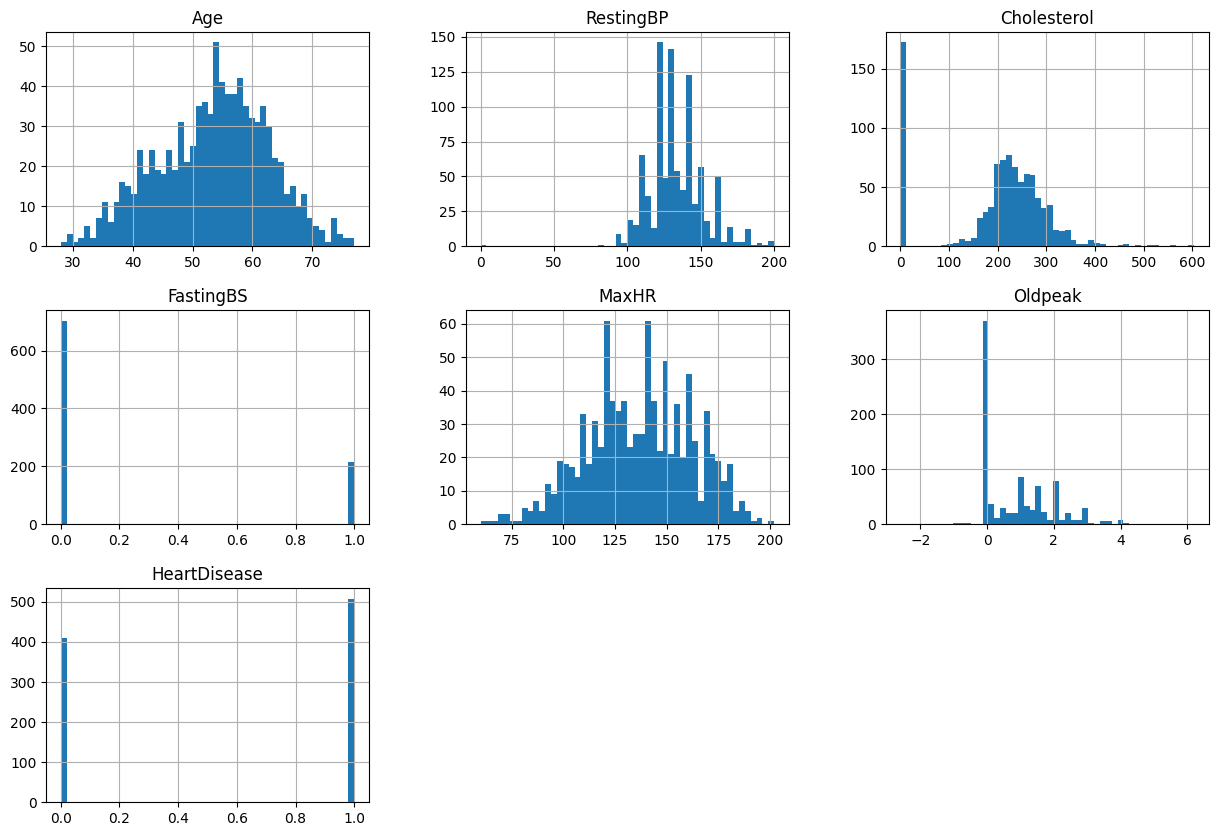

In [ ]:
df.hist(bins=50, figsize=(15,10))
plt.show()

- The age distribution shows that most of the individuals in the data are between 40 and 60 years old.   The highest peak indicates that there are the most people aged 54 years in the dataset.
- Distribution of resting blood pressure The histogram in the RestingBP column shows that the majority of people in the data have normal resting blood pressure (below 120 mmHg).
- The distribution of maximum heart rates shows that the majority of people in the data had normal maximum heart rates (between 75 and 150 bpm).
- The distribution of ST depression (Oldpeak) shows that the majority of people in the data do not have ST depression (0 mm).

**correlation matrix**

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

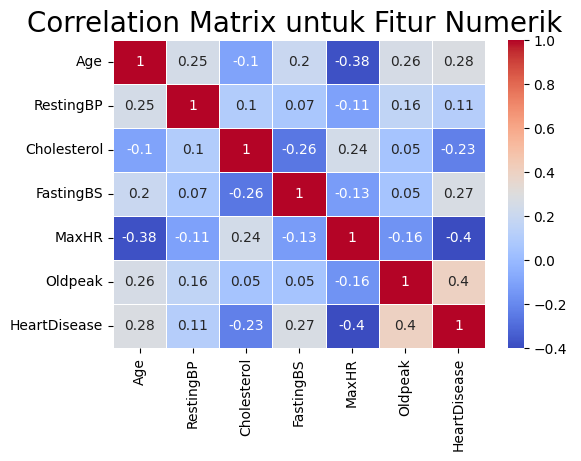

In [ ]:
plt.figure(figsize=(6, 4))
correlation_matrix = df.select_dtypes(include=['number']).corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

## Multivariate Analysis

### Ctegorical Feature

In [ ]:
categorical_features = df.select_dtypes(include='object').columns.to_list()

for col in categorical_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

NameError: name 'df' is not defined

# Data Preprocessing

In [ ]:
from sklearn.preprocessing import  OneHotEncoder
df = pd.concat([df, pd.get_dummies(df['Sex'], prefix='Sex')],axis=1)
df = pd.concat([df, pd.get_dummies(df['ChestPainType'], prefix='ChestPainType')],axis=1)
df = pd.concat([df, pd.get_dummies(df['FastingBS'], prefix='FastingBS')],axis=1)
df = pd.concat([df, pd.get_dummies(df['RestingECG'], prefix='RestingECG')],axis=1)
df = pd.concat([df, pd.get_dummies(df['ExerciseAngina'], prefix='ExerciseAngina')],axis=1)
df = pd.concat([df, pd.get_dummies(df['ST_Slope'], prefix='ST_Slope')],axis=1)
df.drop(['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1, inplace=True)
df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,False,True,False,True,...,True,False,False,True,False,True,False,False,False,True
1,49,160,180,156,1.0,1,True,False,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,98,0.0,0,False,True,False,True,...,True,False,False,False,True,True,False,False,False,True
3,48,138,214,108,1.5,1,True,False,True,False,...,True,False,False,True,False,False,True,False,True,False
4,54,150,195,122,0.0,0,False,True,False,False,...,True,False,False,True,False,True,False,False,False,True


## Spliting Data

In [ ]:
from sklearn.model_selection import train_test_split


# feature & target
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 918
Total # of sample in train dataset: 516
Total # of sample in test dataset: 230


## Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

### Standarization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
806,1.690083,0.629639,-0.243189,-0.453928,1.457959
475,0.522920,2.400906,-1.867052,-0.652157,-0.819370
449,0.098497,-7.153205,-1.867052,0.735443,0.494474
697,0.416815,0.898012,0.652736,-1.008968,-0.118653
821,0.629026,-1.678377,1.100698,0.933672,-0.819370


In [ ]:
X_train[numerical_features].describe().round(4)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,516.0000,516.0000,516.0000,516.0000,516.0000
mean,0.0000,0.0000,0.0000,-0.0000,-0.0000
std,1.0010,1.0010,1.0010,1.0010,1.0010
min,-2.6603,-7.1532,-1.8671,-2.7534,-3.0967
25%,-0.7503,-0.7122,-0.2152,-0.7314,-0.8194
50%,0.0985,-0.1755,0.2141,0.0615,-0.3814
75%,0.7351,0.3613,0.6527,0.7354,0.5821
max,2.4328,3.5818,2.4819,2.2023,4.6112
